In [1]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
!pip install https://github.com/amaiya/eli5-tf/archive/refs/heads/master.zip

     / 6.9 MB 6.9 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=108149 sha256=46c1e4a2806408c82eb74397cf1546e7e181e03ec9b1e7d44eb54e59be7a0e3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_6k5t2_l/wheels/0b/14/54/23c07f7254b733dc3daac99ba1fda60e30f1b2991b3b8ee0bf
Successfully built eli5


In [2]:
df2 = pd.read_csv("https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv")
df2.columns = ["label" , "title" , "content"]
df2['label'] = df2['label'].map({1: "world", 2: "sports", 3: "business", 4: "sci/tech"})


In [3]:
!pip3 install ktrain
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 66.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 77.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 61.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [4]:
X = df2.content
Y = df2.label

In [5]:
# x_train, x_val, y_train, y_val = train_test_split(df['content'], df['category_1'], shuffle=True, test_size = 0.2, random_state = 12342 , stratify=df['category_1'])
# x_train, x_val, y_train, y_val = train_test_split(df['content'], df['category_1'], shuffle=True, test_size = 0.2, random_state = 12342 , stratify=df['category_1'])
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.9, random_state = 12342 , stratify=Y)

# Then, split the temporary set into a validation set and a test set (50% for each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.9, random_state = 12342 , stratify=y_temp)


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(11999,)
(11999,)
(10800,)
(10800,)
(97200,)
(97200,)


In [7]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

In [8]:
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=["world", "sport", "business" , "sci/tech"])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

preprocessing train...
language: en
train sequence lengths:
	mean : 31
	95percentile : 45
	99percentile : 62


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 31
	95percentile : 45
	99percentile : 63


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
1999/1999 [==============================] - 189s 88ms/step - loss: 0.9191 - accuracy: 0.6001
Epoch 2/2
1999/1999 [==============================] - 80s 40ms/step - loss: 16.3341 - accuracy: 0.2481


done.
Visually inspect loss plot and select learning rate associated with falling loss


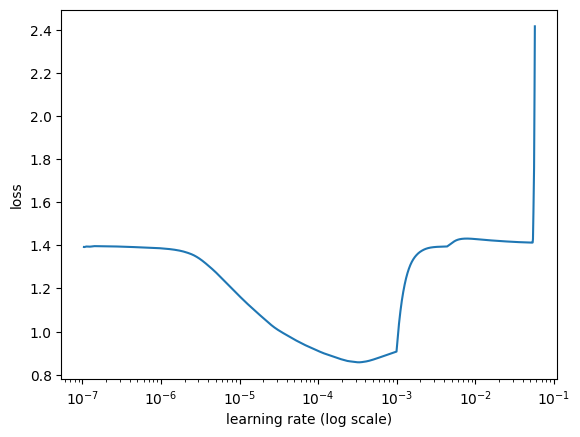

In [9]:
learner.lr_find(show_plot=True, max_epochs=2)


In [11]:
learner.fit_onecycle(8e-5, 4)



begin training using onecycle policy with max lr of 8e-05...
Epoch 1/4
2000/2000 [==============================] - 471s 234ms/step - loss: 0.3893 - accuracy: 0.8714 - val_loss: 0.2733 - val_accuracy: 0.9081
Epoch 2/4
2000/2000 [==============================] - 469s 235ms/step - loss: 0.2545 - accuracy: 0.9171 - val_loss: 0.3338 - val_accuracy: 0.9025
Epoch 3/4
2000/2000 [==============================] - 469s 235ms/step - loss: 0.1798 - accuracy: 0.9438 - val_loss: 0.2985 - val_accuracy: 0.9071
Epoch 4/4
2000/2000 [==============================] - 469s 235ms/step - loss: 0.0769 - accuracy: 0.9778 - val_loss: 0.3240 - val_accuracy: 0.9079


In [12]:
learner.validate(class_names=t.get_classes())

3038/3038 [==============================] - 293s 96ms/step
              precision    recall  f1-score   support

    business       0.87      0.87      0.87     24300
    sci/tech       0.88      0.87      0.88     24300
      sports       0.96      0.97      0.97     24300
       world       0.91      0.92      0.92     24300

    accuracy                           0.91     97200
   macro avg       0.91      0.91      0.91     97200
weighted avg       0.91      0.91      0.91     97200



array([[21077,  2175,   213,   835],
       [ 1931, 21256,   172,   941],
       [  233,   127, 23645,   295],
       [  881,   582,   564, 22273]])

In [13]:
learner.view_top_losses(n=1, preproc=t)

3038/3038 [==============================] - 290s 95ms/step
----------
id:96377 | loss:9.79 | true:sports | pred:business)



In [14]:
# understandable mistake - this sci.med post talks a lot about computer graphics
print(x_test[96377])

Ford Motor Co. announced Friday that it would eliminate 1,150 jobs in England to streamline its Jaguar Cars Ltd. unit, where weak sales have failed to offset spending on new products and other parts of the business.


In [15]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [16]:
predictor.predict('Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.')

'business'

In [19]:
predictor.explain('Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.')

In [21]:
predictor.save('/content/tmp/4topics_calssification_predictor')

In [22]:
reloaded_predictor = ktrain.load_predictor('/tmp/4topics_calssification_predictor')

In [23]:
reloaded_predictor.predict('Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.')

'business'

In [24]:
reloaded_predictor.predict_proba('Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.')

array([9.9842298e-01, 7.6377817e-04, 1.2280156e-04, 6.9044263e-04],
      dtype=float32)

In [25]:
reloaded_predictor.get_classes()

['business', 'sci/tech', 'sports', 'world']

In [27]:
y_pred = reloaded_predictor.predict(x_test)

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def compute_classification_report(true_labels_column, predicted_labels_column):
    # y_true = sampled_df[true_labels_column]
    # y_pred = sampled_df[predicted_labels_column]
    report = classification_report(true_labels_column, predicted_labels_column)
    # print(predicted_labels_column)
    print(report)
    accuracy = accuracy_score(true_labels_column, predicted_labels_column)
    return accuracy

In [31]:
compute_classification_report(y_test , y_pred)

              precision    recall  f1-score   support

    business       0.87      0.87      0.87     24300
    sci/tech       0.88      0.87      0.88     24300
      sports       0.96      0.97      0.97     24300
       world       0.91      0.92      0.92     24300

    accuracy                           0.91     97200
   macro avg       0.91      0.91      0.91     97200
weighted avg       0.91      0.91      0.91     97200



0.9079320987654321